In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import pandas as pd


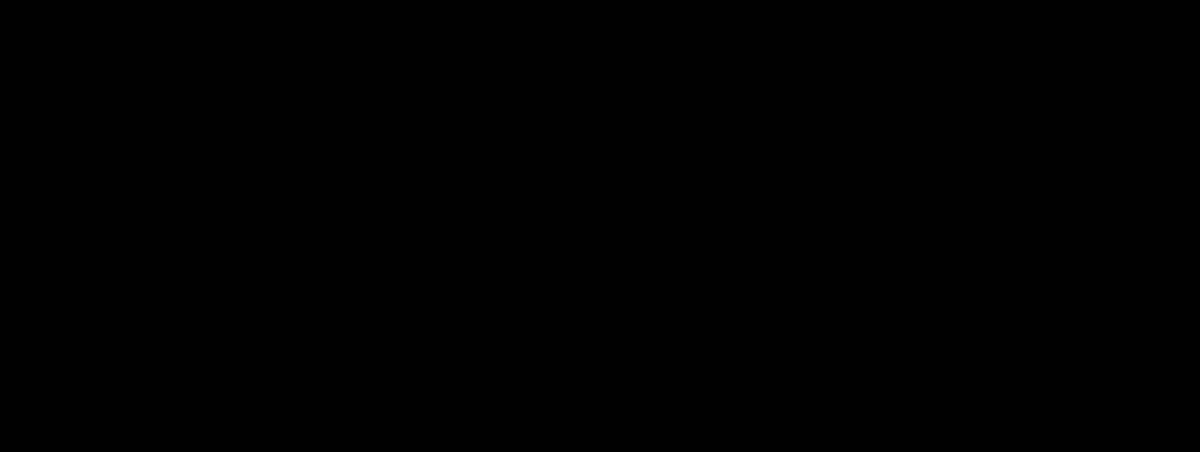

In [ ]:
# empty image
grid = np.zeros((height,width,3), dtype=np.uint8)

cv2_imshow(grid)

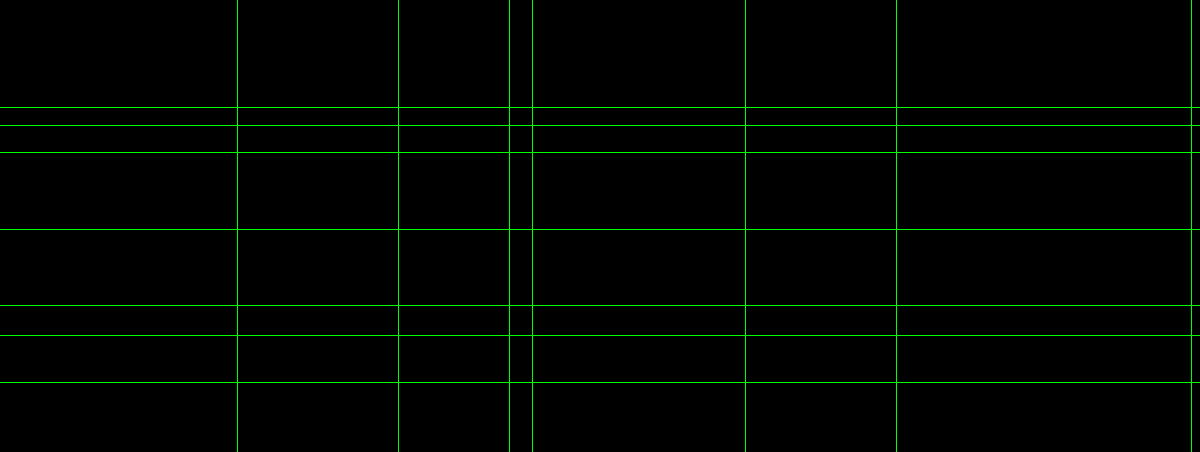

In [ ]:
grid_lines_vertical=[237.0, 398.2, 532.8, 509.2, 745.0, 896.3, 1191.6]
grid_lines_horizontal=[305.2, 335.2, 382.5, 229.2, 152.4, 125.4, 107.6]
line_color=(0, 255, 0)

for v in grid_lines_vertical:
  v=int(v)
  grid=cv2.line(grid,(v, 0), (v, height), line_color, 1)

for h in grid_lines_horizontal:
  h=int(h)
  grid=cv2.line(grid, (0, h), (width, h), line_color, 1)

cv2_imshow(grid)

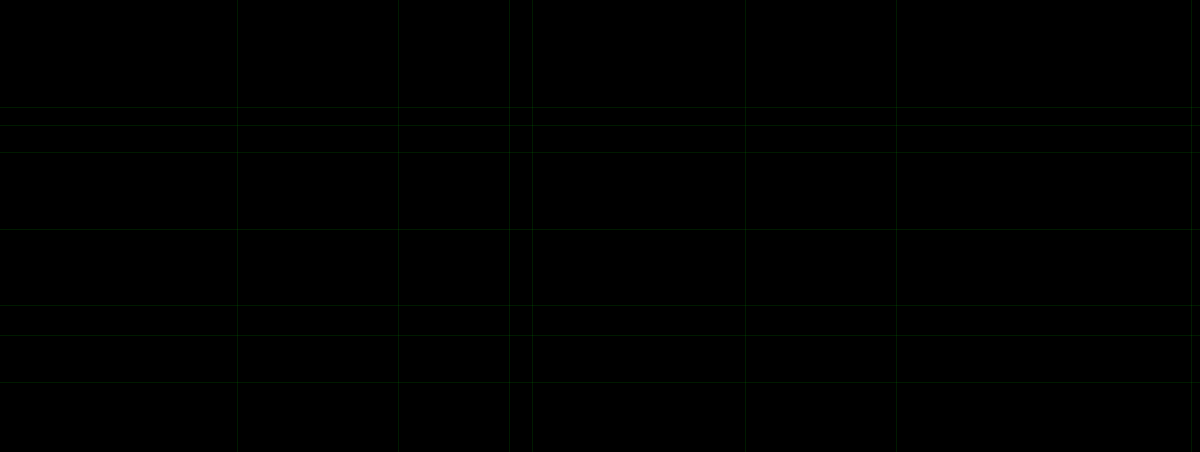

True

In [ ]:
import cv2
import numpy as np

# Define the grid size
width, height = 1200, 452

# Create a blank grid
grid = np.zeros((height, width, 3), dtype=np.uint8)

# Original decimal grid lines
grid_lines_vertical = [237.0, 398.2, 532.8, 509.2, 745.0, 896.3, 1191.6]
grid_lines_horizontal = [305.2, 335.2, 382.5, 229.2, 152.4, 125.4, 107.6]
line_color = (0, 255, 0)

# Scaling factor to preserve decimal precision
scale = 10  # Adjust based on the level of precision needed
scaled_width = width * scale
scaled_height = height * scale
scaled_grid = np.zeros((scaled_height, scaled_width, 3), dtype=np.uint8)

# Scale coordinates
scaled_vertical = [int(v * scale) for v in grid_lines_vertical]
scaled_horizontal = [int(h * scale) for h in grid_lines_horizontal]

# Draw vertical lines
for v in scaled_vertical:
    scaled_grid = cv2.line(scaled_grid, (v, 0), (v, scaled_height), line_color, 1)

# Draw horizontal lines
for h in scaled_horizontal:
    scaled_grid = cv2.line(scaled_grid, (0, h), (scaled_width, h), line_color, 1)

# Downscale back to original size
grid = cv2.resize(scaled_grid, (width, height), interpolation=cv2.INTER_AREA)

# Display the grid
cv2_imshow(grid)
cv2.imwrite('/content/grid.png', grid)

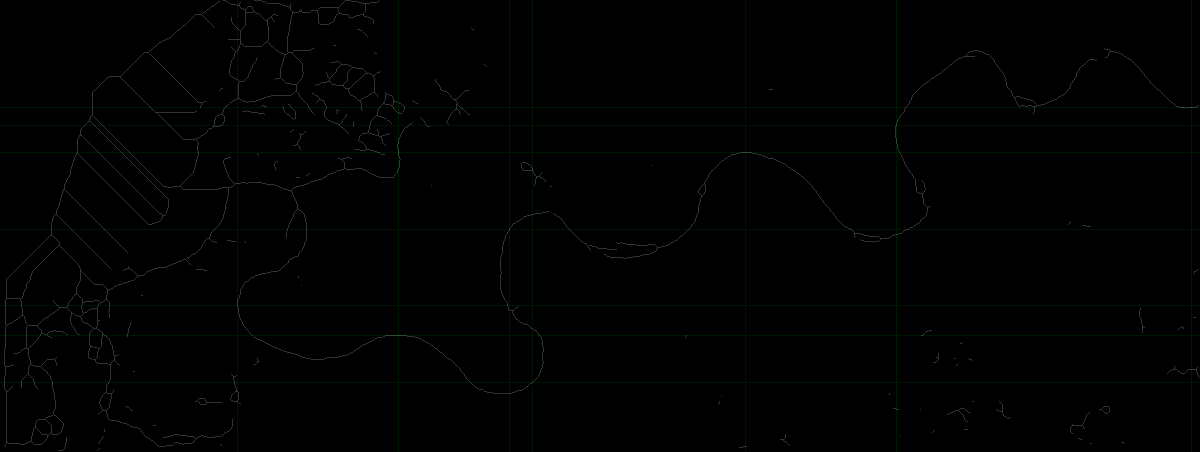

In [ ]:
grid=cv2.imread('/content/grid (1).png')
im_2003=cv2.imread('/content/combined_skeleton_2003.png')
comparison=cv2.addWeighted(grid, 0.8, im_2003, 0.2, 0)
cv2_imshow(comparison)

(4520, 12000)
[2374 3110]
nearest white pixel:237.4,311.0


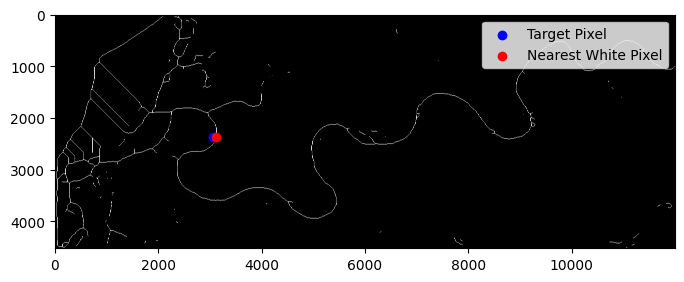

In [ ]:
im_2015=cv2.imread('/content/combined_skeleton_2015.png', )
im_2015_gray=cv2.cvtColor(im_2015, cv2.COLOR_BGR2GRAY)

scale_factor=10

im_2015_gray_scaled=cv2.resize(im_2015_gray, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
print(im_2015_gray_scaled.shape)

threhold_val, im_2015_gray_scaled = cv2.threshold(im_2015_gray_scaled, 127, 255, cv2.THRESH_BINARY)


# counts, bins = np.histogram(im_2015, range(257))
# # plot histogram centered on values 0..255
# plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
# plt.xlim([-0.5, 255.5])
# plt.show()


# counts, bins = np.histogram(im_2015_gray, range(257))
# # plot histogram centered on values 0..255
# plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
# plt.xlim([-0.5, 255.5])
# plt.show()


target_pixel=(int(237.0 *scale_factor), int(305.2*scale_factor))
# # Calculate the distance transform
# distance_transform = cv2.distanceTransform(im_2015_gray, cv2.DIST_L2, 3)

# # Get the distance value for the target pixel
# distance_to_white = distance_transform[target_pixel[1], target_pixel[0]]

# print(f"Distance to the nearest white pixel: {distance_to_white}")

# nearest_white = np.unravel_index(np.argmin(distance_transform), distance_transform.shape)

white_pixels = np.column_stack(np.where(im_2015_gray_scaled == 255))

# Compute the Euclidean distance to all white pixels
distances = np.sqrt((white_pixels[:, 0] - target_pixel[0]) ** 2 + (white_pixels[:, 1] - target_pixel[1]) ** 2)

nearest_index = np.argmin(distances)
nearest_white_pixel = white_pixels[nearest_index]

print(nearest_white_pixel)
print(f'nearest white pixel:{nearest_white_pixel[0]/10},{nearest_white_pixel[1]/10}')

# Highlight the nearest white pixel in red
colored_image = cv2.cvtColor(im_2015_gray_scaled, cv2.COLOR_GRAY2BGR)
colored_image[nearest_white_pixel[0], nearest_white_pixel[1]] = [0, 0, 255]  # Mark in red (BGR format)

# Highlight the target pixel in blue for reference
colored_image[target_pixel[0], target_pixel[1]] = [255, 0, 0]  # Mark in blue

plt.figure(figsize=(8, 8))
plt.imshow(colored_image)
plt.scatter(target_pixel[1], target_pixel[0], color='blue', label='Target Pixel')
plt.scatter(nearest_white_pixel[1], nearest_white_pixel[0], color='red', label='Nearest White Pixel')
plt.legend()
plt.show()


In [ ]:
def get_pixel_change(control_point, image):

  threhold_val, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

  target_pixel=(control_point[0], control_point[1])

  white_pixels = np.column_stack(np.where(thresh == 255))

  distances = np.sqrt((white_pixels[:, 0] - target_pixel[0]) ** 2 + (white_pixels[:, 1] - target_pixel[1]) ** 2)

  if distances.size !=0:
    nearest_index = np.argmin(distances)
    nearest_white_pixel = white_pixels[nearest_index]
    minimum_distance=np.min(distances)
    return nearest_white_pixel[0], nearest_white_pixel[1], minimum_distance

  else:
    return None, None, None


In [ ]:
# def generate_dateset(image_path):
#     control_points = [
#         [304, 219], [304, 228], [247, 316], [247, 314],
#         [389, 328], [389, 344], [545, 377], [545, 373]
#     ]
#     image_files = os.listdir(image_path)

#     columns = pd.MultiIndex.from_tuples([
#         ('image', 'name'),
#         ('c1', 'x'), ('c1', 'y'), ('c1', 'dist'),
#         ('c2', 'x'), ('c2', 'y'), ('c2', 'dist'),
#         ('c3', 'x'), ('c3', 'y'), ('c3', 'dist'),
#         ('c4', 'x'), ('c4', 'y'), ('c4', 'dist'),
#         ('c5', 'x'), ('c5', 'y'), ('c5', 'dist'),
#         ('c6', 'x'), ('c6', 'y'), ('c6', 'dist'),
#         ('c7', 'x'), ('c7', 'y'), ('c7', 'dist'),
#         ('c8', 'x'), ('c8', 'y'), ('c8', 'dist')
#     ])

#     df = pd.DataFrame(columns=columns)
#     main_columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']

#     for i in image_files:
#         img = cv2.imread(os.path.join(image_path, i))
#         new_row = {'image': {'name': i}}

#         for main_column in main_columns:
#             idx = main_columns.index(main_column)
#             x, y, dist = get_pixel_change(control_points[idx], img)

#             if str(type(x)) == 'None' and str(type(y)) == 'None':
#                 continue

#             ret_val = {'x': x, 'y': y, 'dist': dist}
#             for subcol, value in ret_val.items():
#                 new_row[(main_column, subcol)] = value

#         df.loc[len(df)] = new_row
#         # df.to_csv('/content/meander_displacement.csv', index=False)
#     print(df)

In [ ]:
def generate_dataset(image_path):
    # Define control points
    control_points = [
        [2382, 2688], [2292, 2691], [4339, 2937], [4339, 3107], [5830, 3470], [6000, 3575], [5390, 2645], [5582, 2563]
    ]
    image_files = os.listdir(image_path)

    # Define MultiIndex columns
    columns = pd.MultiIndex.from_tuples([
        ('image', 'name'),
        ('c1', 'x'), ('c1', 'y'), ('c1', 'dist'),
        ('c2', 'x'), ('c2', 'y'), ('c2', 'dist'),
        ('c3', 'x'), ('c3', 'y'), ('c3', 'dist'),
        ('c4', 'x'), ('c4', 'y'), ('c4', 'dist'),
        ('c5', 'x'), ('c5', 'y'), ('c5', 'dist'),
        ('c6', 'x'), ('c6', 'y'), ('c6', 'dist'),
        ('c7', 'x'), ('c7', 'y'), ('c7', 'dist'),
        ('c8', 'x'), ('c8', 'y'), ('c8', 'dist')
    ])

    # Initialize an empty DataFrame
    df = pd.DataFrame(columns=columns)

    # Process each image
    for i in image_files:
        try:
            img = cv2.imread(os.path.join(image_path, i))
            if img is None:
                print(f"Unable to read image: {i}")
                continue

            # Initialize a new row
            new_row = {col: None for col in columns}
            new_row[('image', 'name')] = i  # Add the image name

            # Process each control point
            for idx, control_point in enumerate(control_points):
                x, y, dist = get_pixel_change(control_point, img)
                column_prefix = f'c{idx + 1}'  # c1, c2, ..., c8

                # Update row with control point values
                new_row[(column_prefix, 'x')] = x
                new_row[(column_prefix, 'y')] = y
                new_row[(column_prefix, 'dist')] = dist

            # Append the row to the DataFrame
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

        except Exception as e:
            print(f"Could not process {i}: {e}")

    # Save to CSV (optional)
    df.to_csv('/content/meander_displacement.csv', index=False)

    # Return the DataFrame after all images are processed
    return df


In [ ]:
df=generate_dataset('/content/drive/MyDrive/GEE_Exports_Indice/Final Skeletons')

Unable to read image: GEE_Skeletons
Unable to read image: meander_displacement (1).csv
Unable to read image: meander_displacement (1).gsheet


<ipython-input-4-af21648f316d>:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


In [ ]:
df.head()

image    c1                     c2                    c3        \
             name     x     y       dist     x     y      dist     x     y   
0  1988_01_05.png  2312  2648  80.622577  2290  2690  2.236068  3227  3057   

                ...           c5    c6                       c7        \
          dist  ...         dist     x     y         dist     x     y   
0  1118.456079  ...  2572.616567  3259  3378  2748.070232  3218  2980   

                  c8                     
          dist     x     y         dist  
0  2197.682643  3218  2980  2400.496824  

[1 rows x 25 columns]